# **Data Science in Restaurant Analytics: Capstone Project**


A restaurant is a retail establishment that serves prepared food to customers. Restaurants often specialize in certain types of food or present a certain unifying, and often entertaining, theme. For example, there are seafood restaurants, vegetarian restaurants, and ethnic restaurants. For this project i will be applying my data science skill to real-world restaurant data. Analyzing trends, building predictive models and creating video showcasing my insight.

The data set contains data from restaurants from all over the world, containig variables such as Restaurant Name, City, Address, Locality, Cuisines, Currency, Has Table booking, Has Online delivery, delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, and Votes.

The goal of this dataset is to analyze the aggregate rating distribution and creat predictive models for future reference.

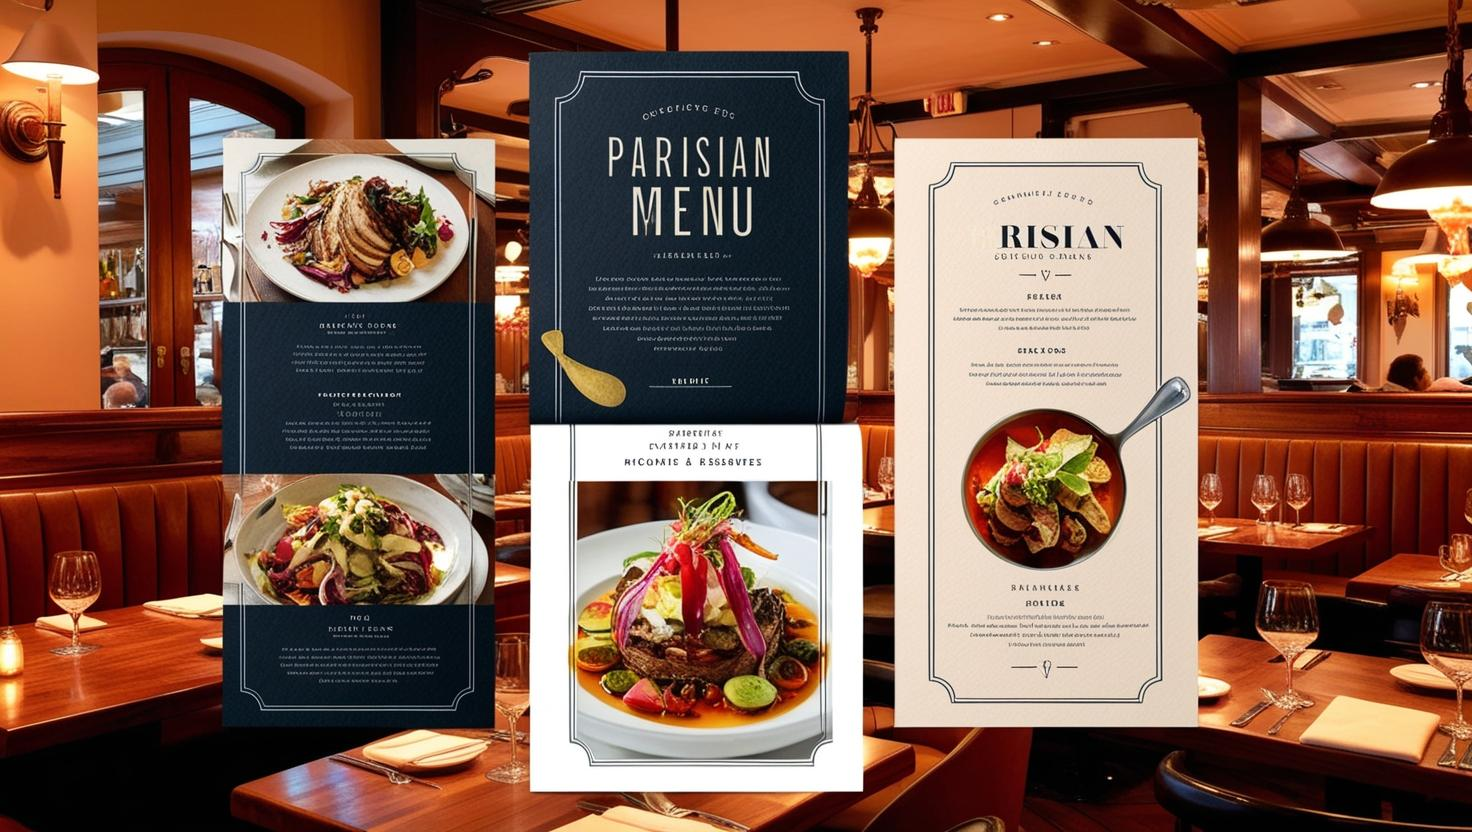

# Week 1: Data Exploration



*    dataset dimensions. Check, Explore for missing values. Perform data

  conversions as needed.
*    Analyze "Aggregate rating" distribution. Address any class imbalances.


*   Calculate statistics for numerical columns. Explore categorical variables. Identify top 5 cuisines and cities.




In [ ]:
# importing necessary liberies
import pandas as pd # for data processing
import numpy as np

import seaborn as sns # for data vitualization
import matplotlib.pyplot as plt # For data visualization
import missingno as msno # For missing data, data visualization
from collections import Counter # for counting

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data set

df = pd.read_csv('https://raw.githubusercontent.com/Oyeniran20/axia_class_cohort_7/refs/heads/main/Dataset%20.csv')

Now that we have loaded the data, let’s take a look at the first few rows of the DataFrame to get an idea of what the data looks like.

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


We can see that the dataset contains 21 columns, including the target column (Aggregate rating), which indicates the ratings by customers that visited this resturants. This ratings could have been affected by any of the other variables in this data, so i will be analysing to see how this variebles affect the aggregate rating such as the country, the cuisines, availabilty or non availabilty of online delivery etc. i will also be droping some columns that are not need for this analysis such as longitude, latitude, resturant id etc.

DATA UNDERSTANDING

In [ ]:
# Dimentionality of the data. that is checking for the number of rows and columns

df.shape

(9551, 21)

The dataset above has 21 columns and 9551 rows

In [ ]:
# Examinig the columns/features of the data

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

This is done so as to properly understand the features and how they are writtin, such as capital letters or spaces withing the features, so as to avoid errors while coding.

In [ ]:
# investigate the dataset for annomalies and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

This has giving us more information about the dataset. we can see the number of entries which represents the rows, the columns which are the features. it also shows that some datas are missing in cuisines because we have 9542 instead of 9551 rows that the other features had. This also shows the data types for each variable.

In [ ]:
null_val = df.isnull().sum()
null_val

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


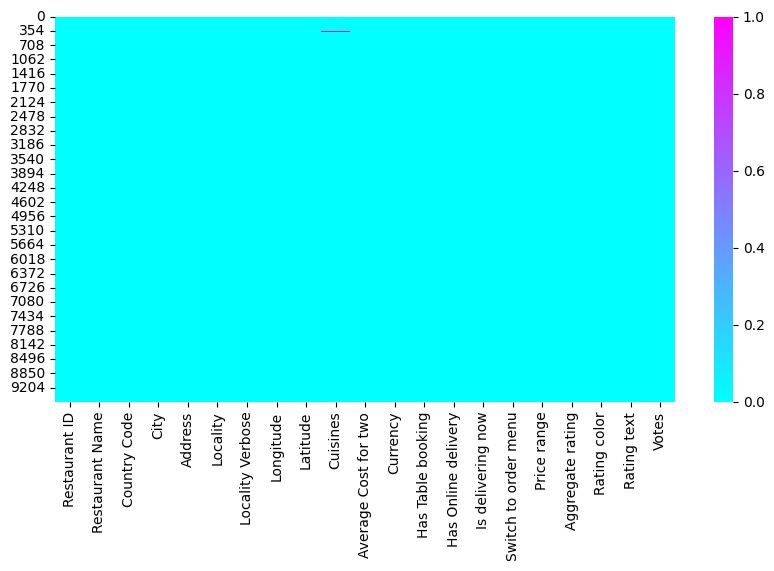

In [ ]:
# Vissualize the missing data
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=True, cmap='cool');

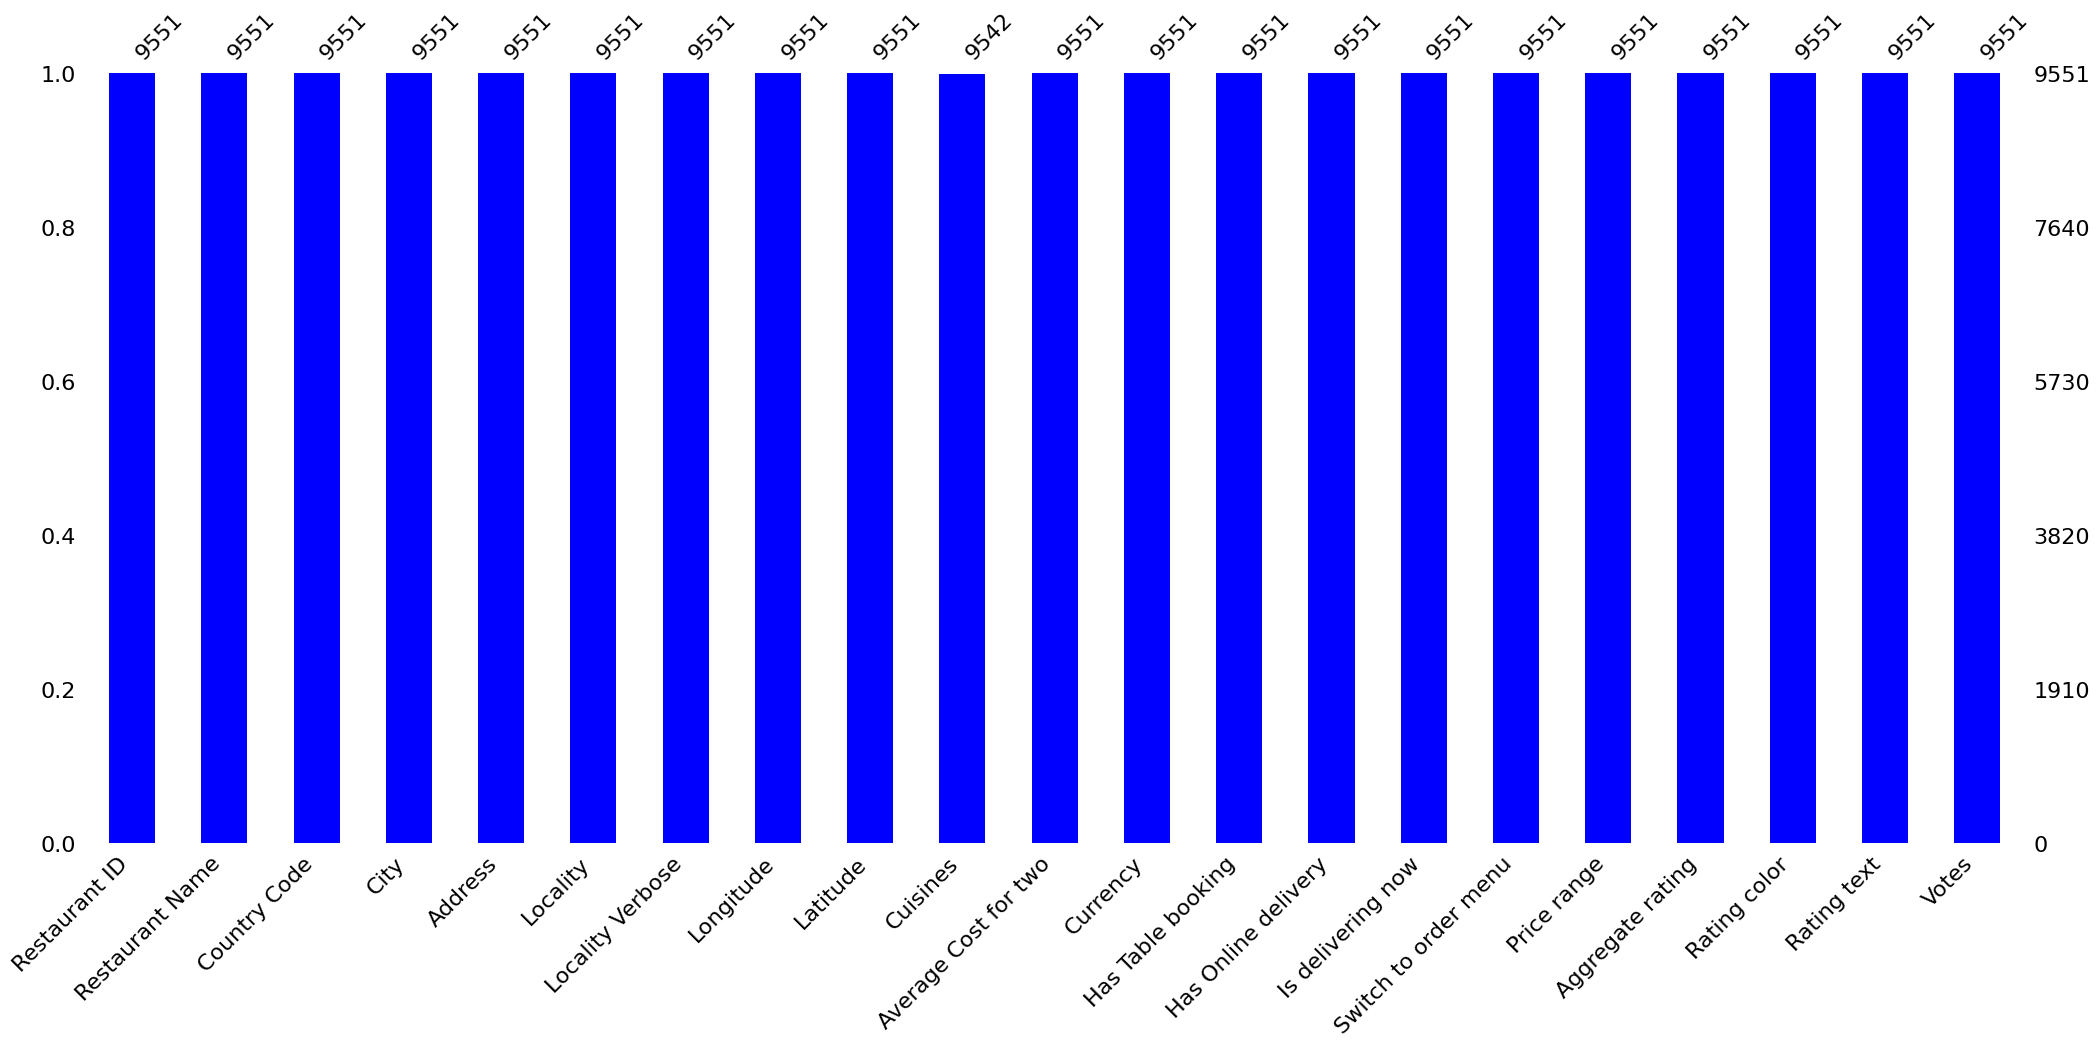

In [ ]:
plt.figure(figsize=(8,5))
msno.bar(df, color='blue');

The earlier table above was able to show me that i have nine missing data and all under Cuisine while the other rows have no missing data. I also wonder why the data types for the missing data is interger instead of objects like the earlier info we got about the dataset and wether this could be responcible for it been missing in the dataset. The other two figures above is just to visualize our missing data. If the missing data was much the bar in cuisine would have been smaller but in this case its just nine that is why the bars seem to be at the same level, but in the first figure it clearly indicated with a line that the cuisine is shorter.

In [ ]:
# display where the missing data exist in the dataset
df[df.isnull().any(axis=1)]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,160
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,...,Dollar($),No,No,No,No,3,3.9,Yellow,Good,209
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,...,Dollar($),No,No,No,No,3,3.8,Yellow,Good,102
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,Dollar($),No,No,No,No,1,3.4,Orange,Average,11
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,...,Dollar($),No,No,No,No,3,4.4,Green,Very Good,1158
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,...,Dollar($),No,No,No,No,1,4.7,Dark Green,Excellent,707
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,309


In [ ]:
# percentage of missing value
((df.isnull().sum()) / len(df))* 100

,0
Restaurant ID,0.000000
Restaurant Name,0.000000
Country Code,0.000000
City,0.000000
Address,0.000000
Locality,0.000000
Locality Verbose,0.000000
Longitude,0.000000
Latitude,0.000000
Cuisines,0.094231


Both tables above are just me exploring the missing value. the first one shows exactly the rows where this values are missing while the second one shows the percentage of the missing values. Since the percentage of the missing values is not up to one percent i can descide to drop them, and if i like i can fiil them, but i will leave that for now.

In [ ]:
df.duplicated().sum()

np.int64(0)

There are no duplicate values from the result above. this means that our dataset is clean and we can use it for our analysis.

In [ ]:
# Numerical Statistical Analysis

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


This shows the statistical analysis of only the numerical columns. this shows us the likelyhood of having outliers in our dataset. Looking at Average cost for two we have a mean of 1.1, 25% of 250, 50% 0f 4, 75% 0f 7 and 100% 0f 8 which is obviously inconsistent meaning there are outliers in the dataset. That of Aggregate rating is relatively ok but Votes also indicates the presence of outliers.

In [ ]:
# Categorical Statistical Analysis

df.describe(include=['object', 'bool']).T

,count,unique,top,freq
Restaurant Name,9551,7446,Cafe Coffee Day,83
City,9551,141,New Delhi,5473
Address,9551,8918,"Dilli Haat, INA, New Delhi",11
Locality,9551,1208,Connaught Place,122
Locality Verbose,9551,1265,"Connaught Place, New Delhi",122
Cuisines,9542,1825,North Indian,936
Currency,9551,12,Indian Rupees(Rs.),8652
Has Table booking,9551,2,No,8393
Has Online delivery,9551,2,No,7100
Is delivering now,9551,2,No,9517


The Categorical analysis shows the count, unique, top and frequency. In my code i included bool just for feature refrence because the data type of our categorical column is just object but in cases where i have a dataset that has bool as part of its data type then i will have to include it in my code like i did above. This table above is able to show me the top resturant name which is Cafe Coffee Day with a frequency of 83. The top city which is New Delhi which appeared 5473 times. The top Cuisine which is North Indian with a frequency of 936, to mention but a few.   

# Visualization of some of the categorical columns. This is also known as Univariate analysis

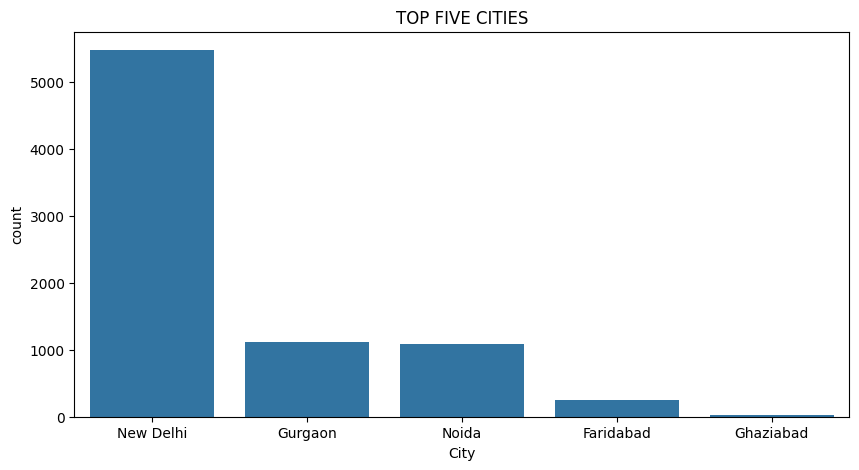

In [ ]:
# number of transactions by city
plt.figure(figsize=(10,5))
top5 = df['City'].value_counts().head(5)
sns.countplot(x= 'City', data=df, order=top5.index)
plt.title(f"TOP FIVE CITIES");

In [ ]:
df['City'].value_counts().head(5)


,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25


The visual above was able to show the top five cities in the dataset which are
New Delhi,
Gurgaon,
Noida,
Faridabad and
Ghaziabad. While the other table shows the count for each city

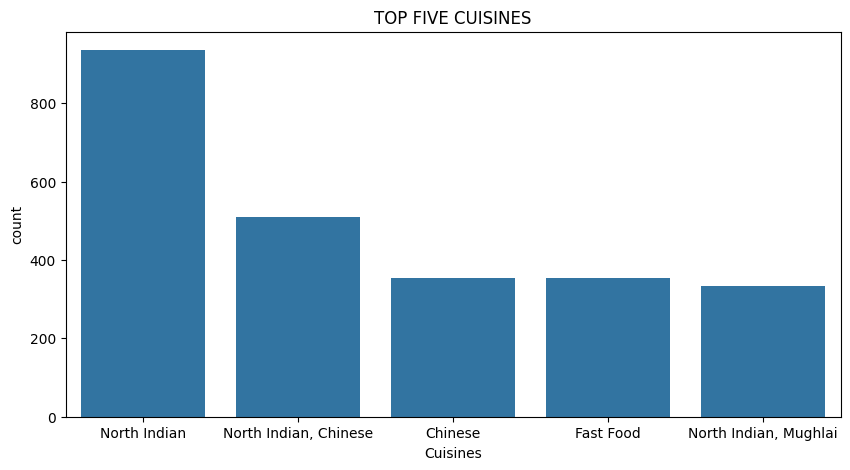

In [ ]:
# visualization of the top 5 Cuisines

plt.figure(figsize=(10,5))
top5= df['Cuisines'].value_counts().head(5)
sns.countplot(x= 'Cuisines', data=df, order=top5.index)
plt.title(f"TOP FIVE CUISINES");

From the figure above, i have my top5 Cuisines as North Indian, North Indian Chinese, Chinese Fast Food and North Indian Mughlai

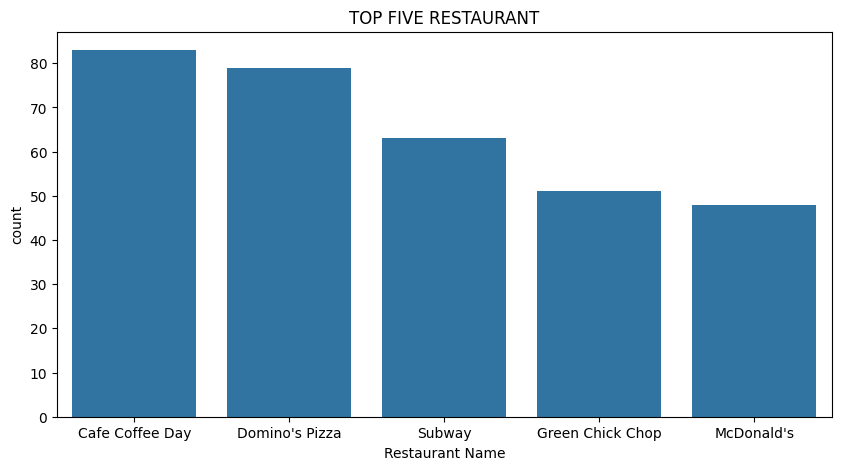

In [ ]:
# visualization of the top 5 restaurant
plt.figure(figsize=(10,5))
top5= df['Restaurant Name'].value_counts().head(5)
sns.countplot(x= 'Restaurant Name', data=df, order=top5.index)
plt.title(f"TOP FIVE RESTAURANT");

The visual above shows us the top five resturants. The favourite been Cafe Coffee Day, followed by Dominos Pizza and so on.

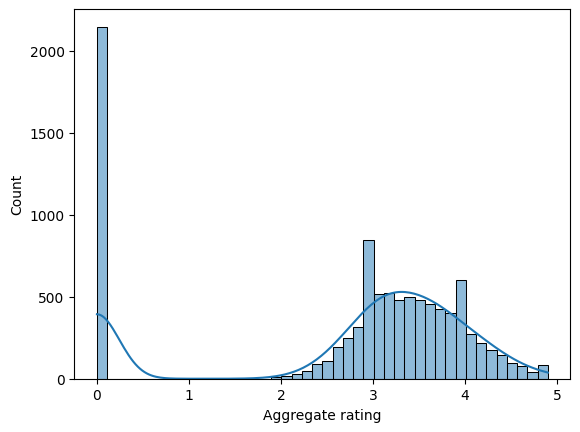

In [ ]:
# checking the distribution of our target variable 'Aggregate rating'
sns.histplot(df['Aggregate rating'], kde=True)
plt.show()

The distribution of the aggregate rating is not a normal distribution

In [ ]:
df['sqrt_Aggregate rating']=np.sqrt(df['Aggregate rating'])

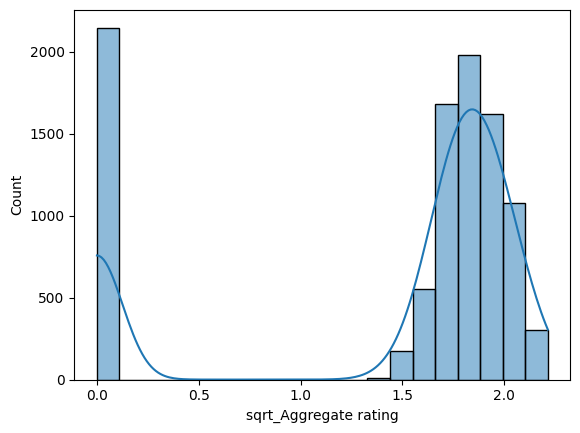

In [ ]:
sns.histplot(df['sqrt_Aggregate rating'], kde=True, bins=20)
plt.show()

Having applied square root transformation, to me the curve still looks thesame so i don't know if it was needed in the first place. I tried using logarithme transformation but its not working.

In [ ]:

df['Log_Ratings'] = np.log1p(df['Aggregate rating'])


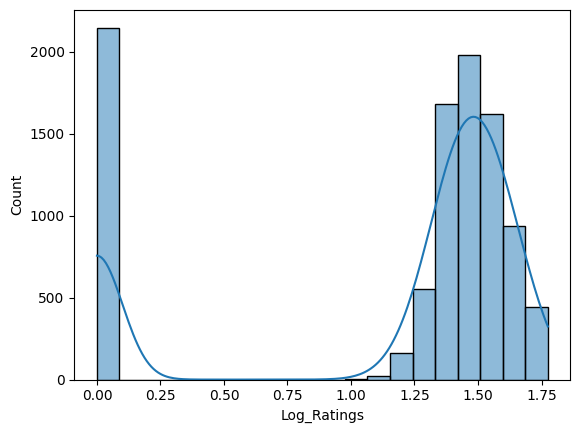

In [ ]:
sns.histplot(df['Log_Ratings'], kde=True, bins=20)
plt.show();

# Week 2: Data Visualization



### *  Visualizations

Create histograms, bar plots, and box plots of ratings. Compare average ratings across cuisines and cities.
### *    Geospatial Analysis





Map restaurant locations using coordinates. Analyze distribution across cities. Correlate location with ratings.


### *  Additional Analysis

Identify outliers and their effects. Determine relationship between votes and ratings.




In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'sqrt_Aggregate rating', 'Log_Ratings'],
      dtype='object')

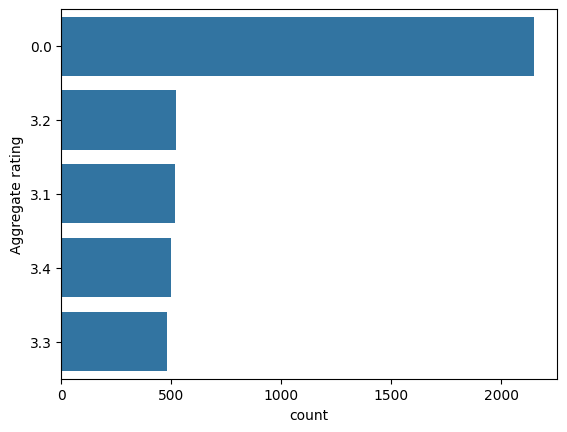

In [ ]:
# bar plot of Aggregate rating
ax= sns.countplot(y=df['Aggregate rating'], order=df['Aggregate rating'].value_counts(ascending=False).head(5).index)
values =df['Aggregate rating'].value_counts(ascending=False).values

The bar chart above shows that the hieghest rating was zero and since it is not possible to rate a restaurant zero, this could only mean that majority of their customers did not give a rating at all.

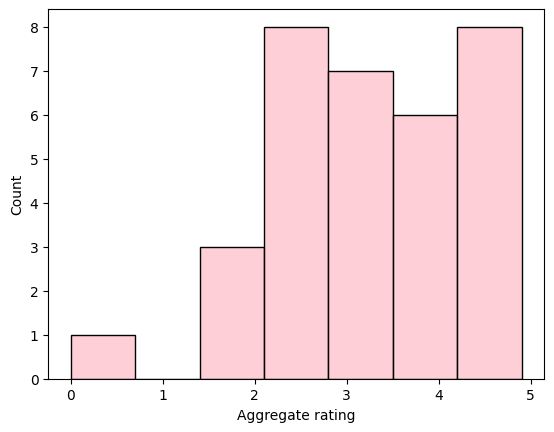

In [ ]:
sns.histplot(df['Aggregate rating'].value_counts(ascending=False).index, color='pink');

In [ ]:
# Categorizing 'Price range'
df['Price_Segment'] = pd.cut(df['Price range'], bins=[0, 2, 3, 4], labels=['Budget', 'Mid-Range', 'Premium'])

# Categorizing 'Aggregate rating'
df['Rating_Segment'] = pd.cut(df['Aggregate rating'], bins=[0, 2, 3.5, 5], labels=['Poor', 'Average', 'Excellent'])

# Categorizing 'Votes'
df['Vote_Segment'] = pd.cut(df['Votes'], bins=[0, 100, 500, df['Votes'].max()], labels=['Low', 'Moderate', 'High'])


In [ ]:
# Group by the created segments
segments = df.groupby(['Price_Segment', 'Rating_Segment', 'Vote_Segment']).size().reset_index(name='Count')

# Display the grouped segments
print(segments)

   Price_Segment Rating_Segment Vote_Segment  Count
0         Budget           Poor          Low      4
1         Budget           Poor     Moderate      3
2         Budget           Poor         High      0
3         Budget        Average          Low   3409
4         Budget        Average     Moderate    411
5         Budget        Average         High     15
6         Budget      Excellent          Low    579
7         Budget      Excellent     Moderate    807
8         Budget      Excellent         High    227
9      Mid-Range           Poor          Low      0
10     Mid-Range           Poor     Moderate      2
11     Mid-Range           Poor         High      0
12     Mid-Range        Average          Low    232
13     Mid-Range        Average     Moderate    160
14     Mid-Range        Average         High     22
15     Mid-Range      Excellent          Low    156
16     Mid-Range      Excellent     Moderate    475
17     Mid-Range      Excellent         High    326
18       Pre

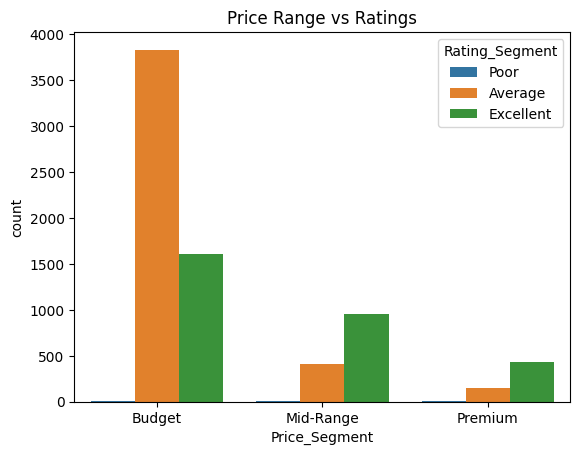

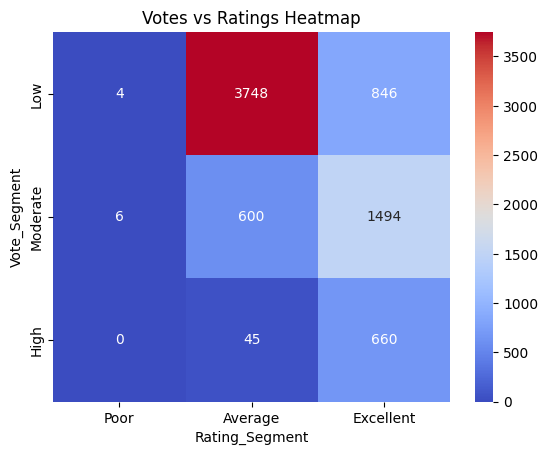

In [ ]:
# Bar plot for price segments
sns.countplot(data=df, x='Price_Segment', hue='Rating_Segment')
plt.title('Price Range vs Ratings')
plt.show()

# Heatmap for votes and ratings
pivot_table = df.pivot_table(index='Vote_Segment', columns='Rating_Segment', values='Price range', aggfunc='count')
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Votes vs Ratings Heatmap');

The visuals above shows that.
  There were more of low prices with majority rated average while some were rated excellent but notably none of them were rated poor despite the price been low, suggesting that even with low price quality can still be provided to customers.
   For the mid-range price and premium price, majority rated them excellent compared to those that rated them average. The punter here is that the higher the price the better the services received by customers compared to the budget price. this also shows that there is a strong correlation between the price and the ratings received.
   The heat map clearly shows the relationship between votes and rating.

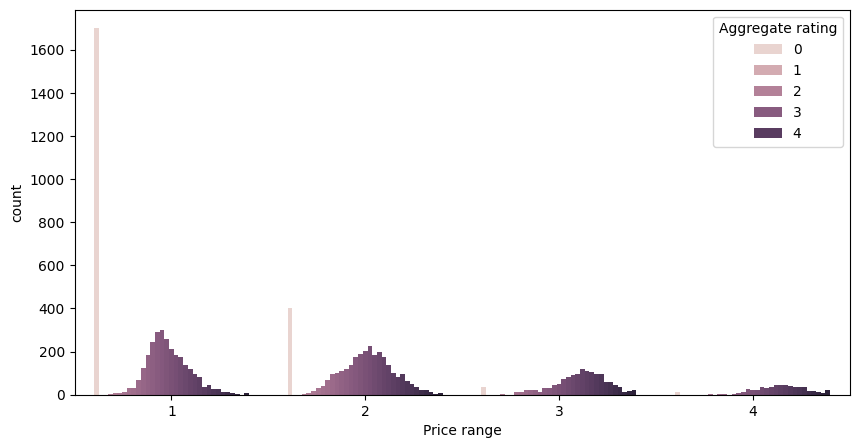

In [ ]:
# comparing ratings across price point
plt.figure(figsize=(10,5))
sns.countplot(x='Price range', data=df, hue='Aggregate rating');

In [ ]:
num_col = df.select_dtypes(include=np.number).columns
cat_col = df.select_dtypes(object).columns

In [ ]:
num_col

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes',
       'sqrt_Aggregate rating', 'Log_Ratings'],
      dtype='object')

Restaurant ID 
 skew = 0.061569976479250714
Country Code 
 skew = 3.043965346403779
Longitude 
 skew = -2.8073278338140857
Latitude 
 skew = -3.08163535060857
Average Cost for two 
 skew = 35.477914900871276
Price range 
 skew = 0.8896175931442
Aggregate rating 
 skew = -0.9541304733200109
Votes 
 skew = 8.807636687709472
sqrt_Aggregate rating 
 skew = -1.2180856619500915
Log_Ratings 
 skew = -1.2102326916677104


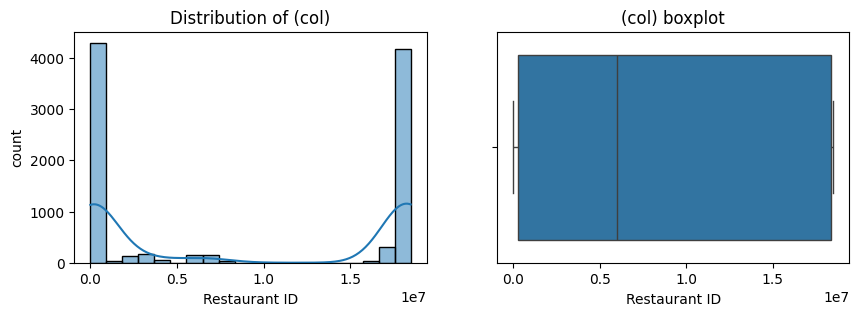

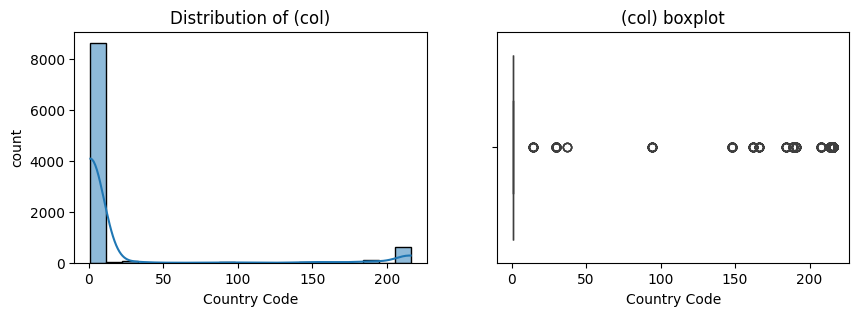

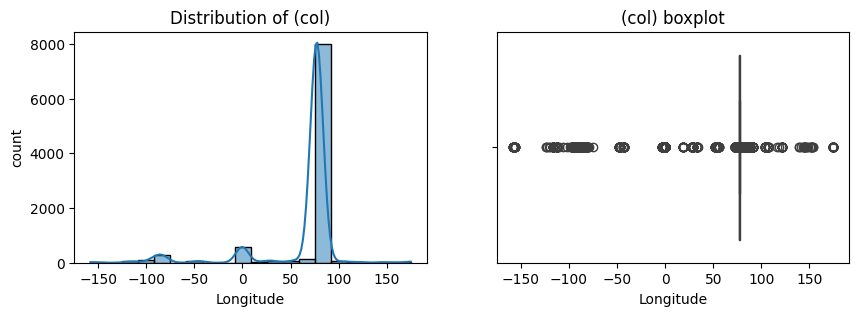

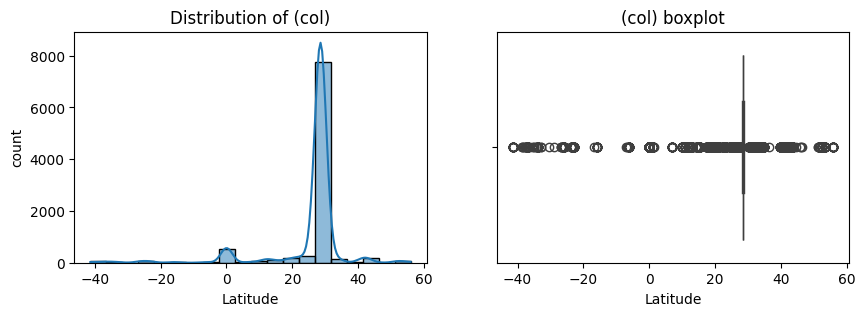

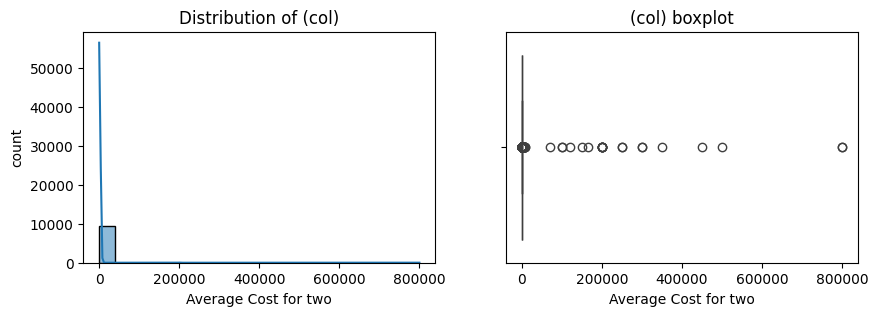

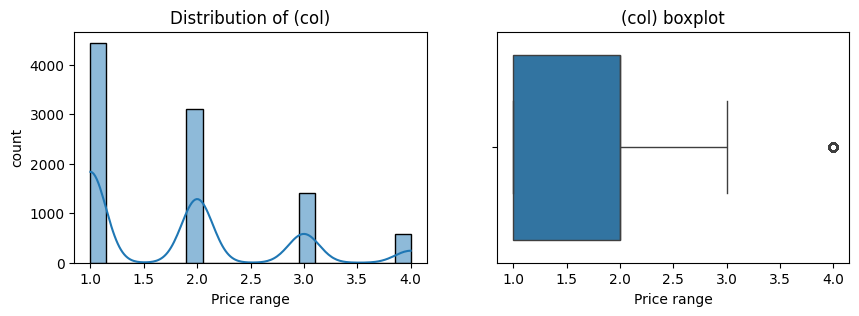

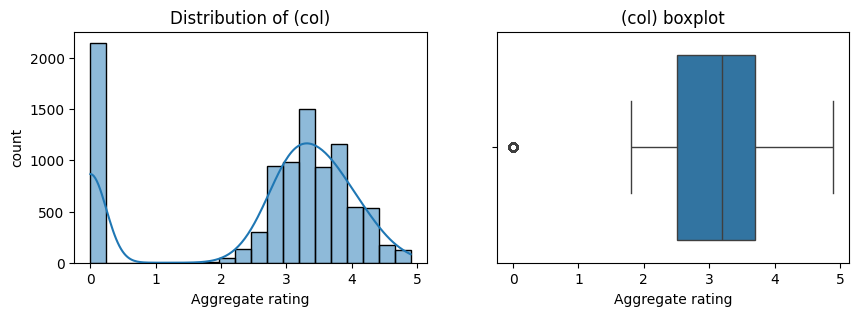

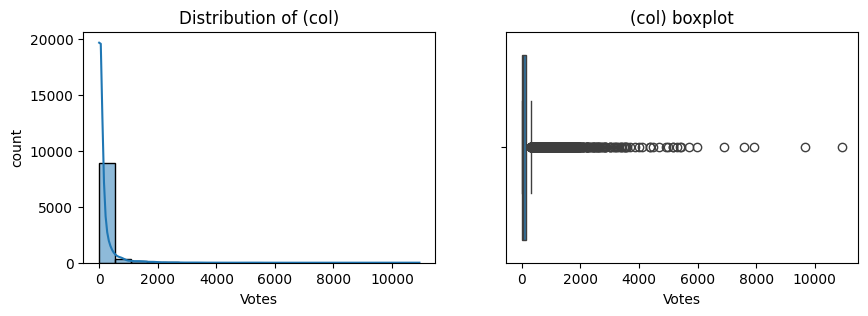

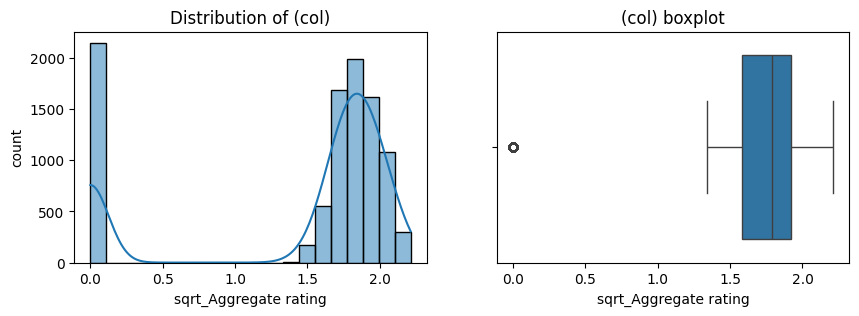

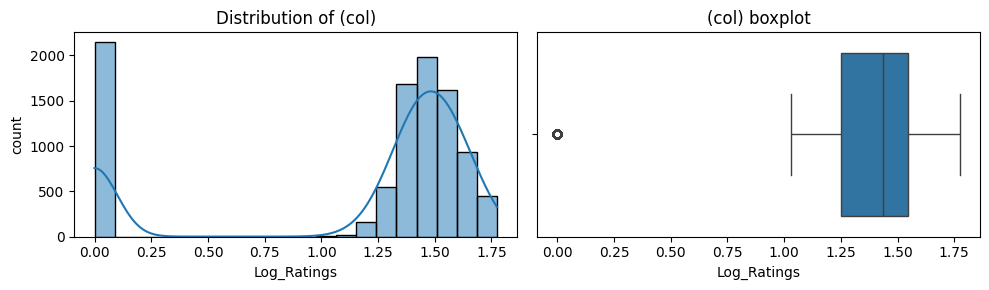

In [ ]:
# checking for the distribution of the numerical columns and skweness

for col in num_col:
  skweness = df[col].skew()
  print(f'{col} \n skew = {skweness}')
  plt.figure(figsize=(10,3))
  # for histogram
  plt.subplot(1,2,1)
  sns.histplot(df[col], kde=True, bins=20)
  plt.title(f'Distribution of (col)')
  plt.xlabel(col)
  plt.ylabel('count')

  # for boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=df[col])
  plt.title(f'(col) boxplot')
  plt.xlabel(col)
plt.tight_layout()
plt.show()


From the visuals above, the dataset has a lot of outliers in Votes.

In [ ]:
cat_col

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

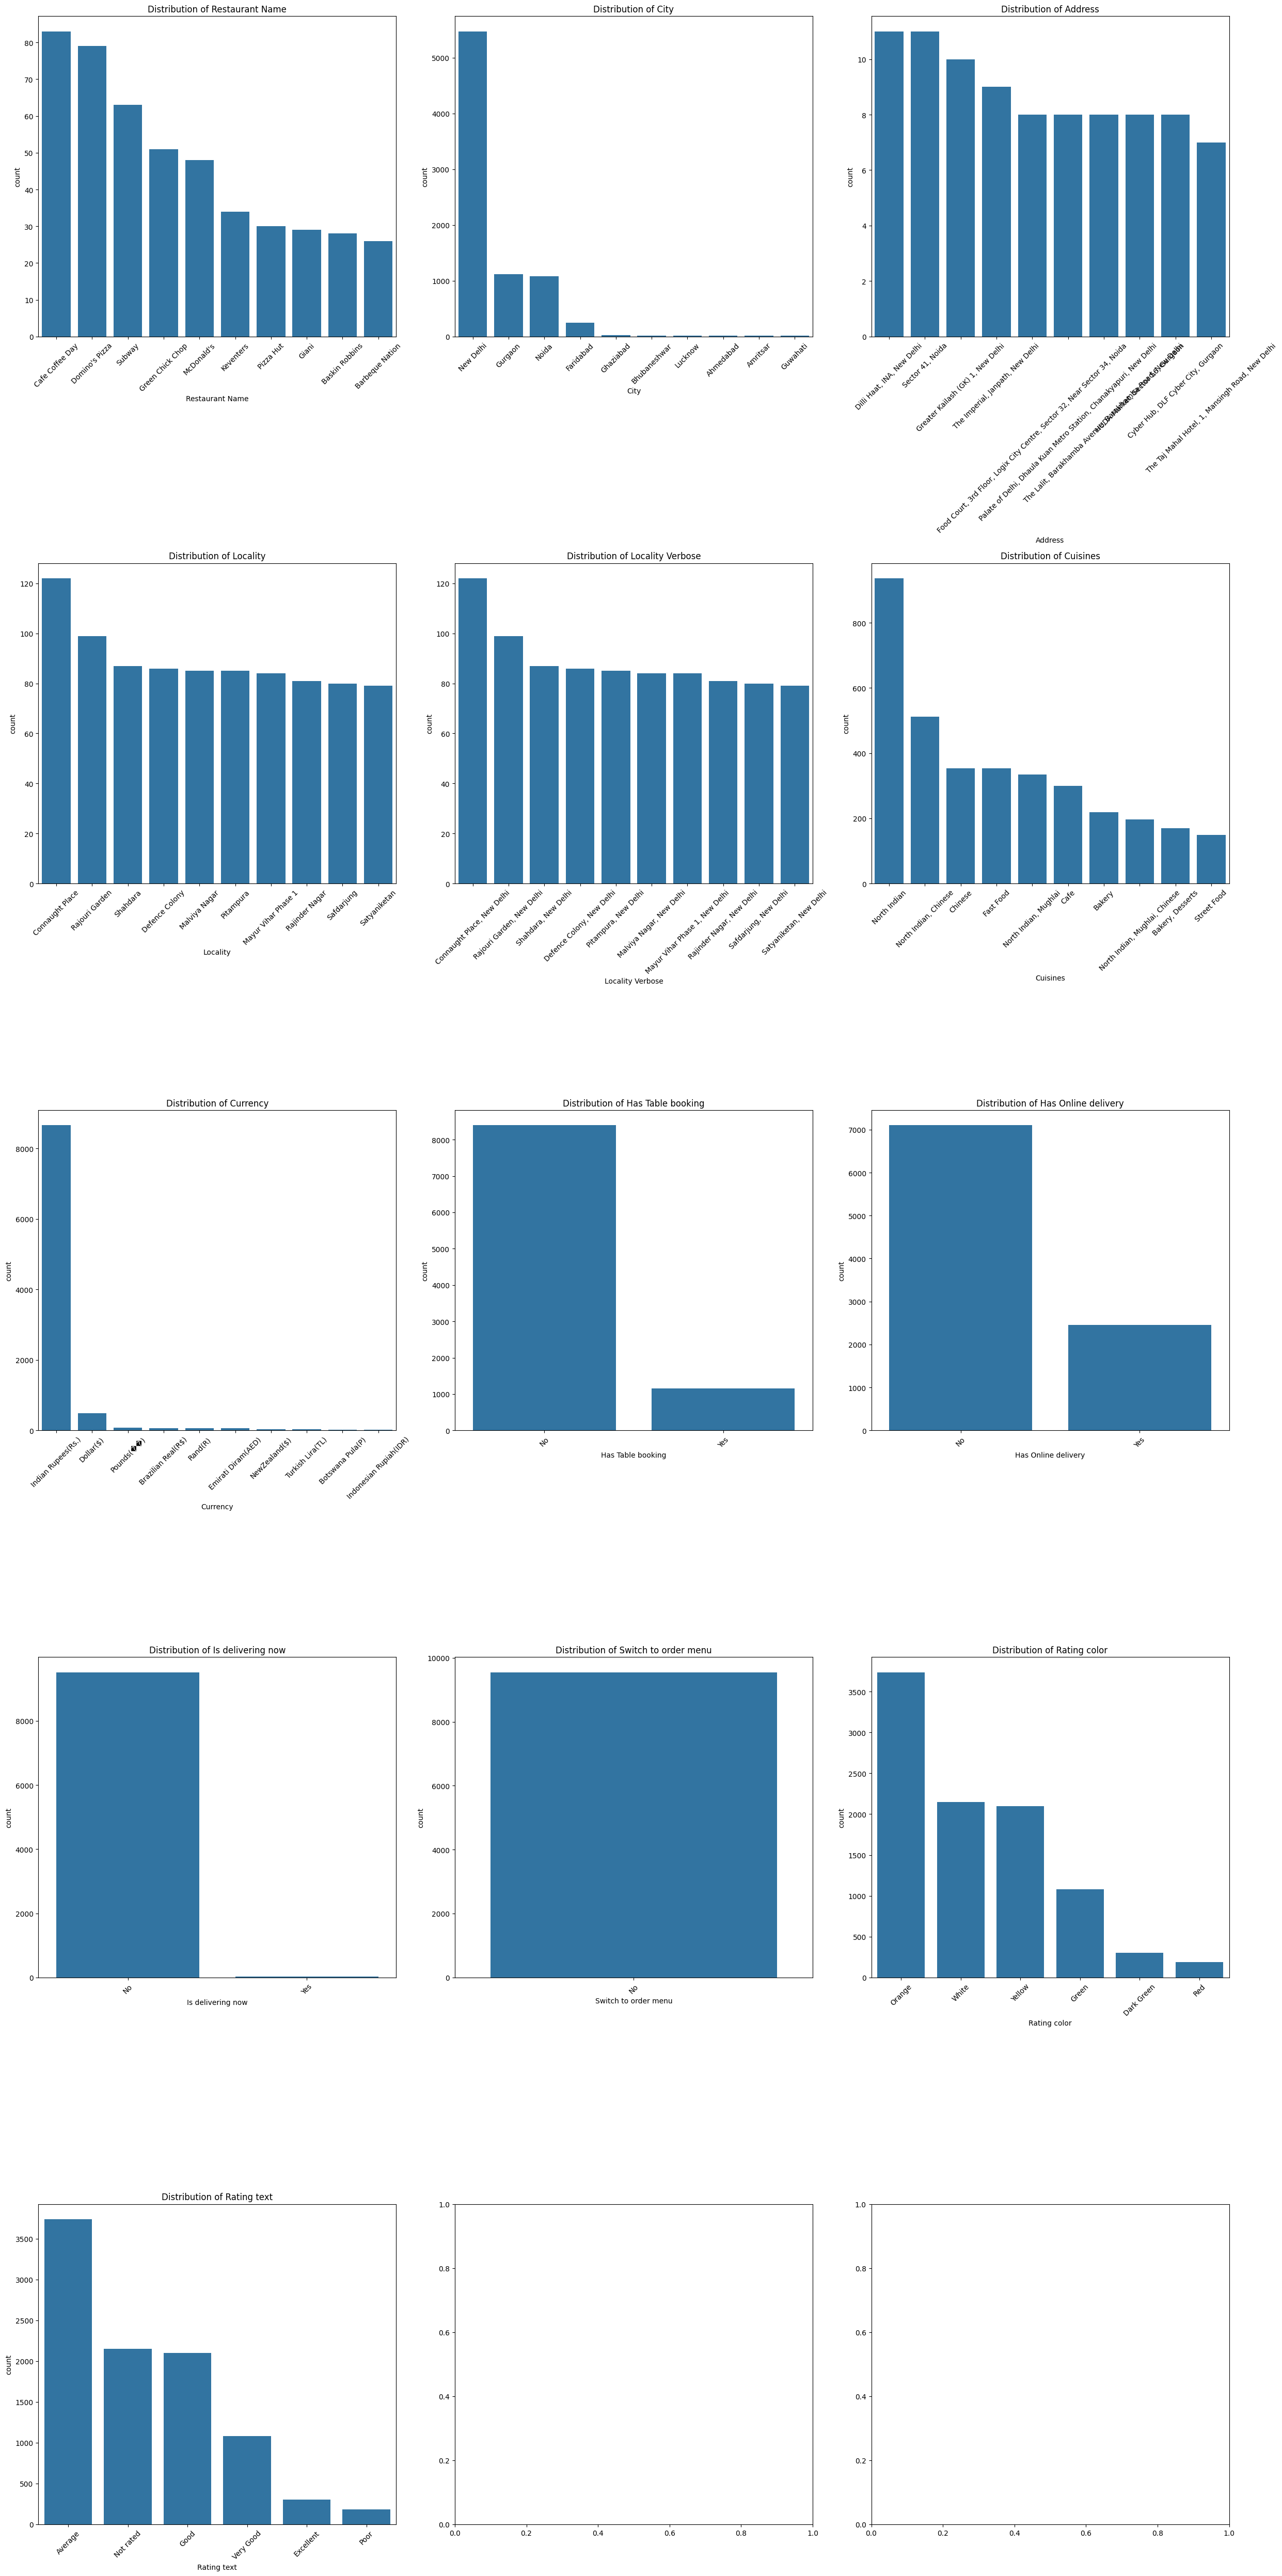

In [ ]:
# visualization of the categorical columns

fig, axis = plt.subplots(5, 3, figsize=(25,50))
for i, col in enumerate(cat_col):
  ax = axis[i//3, i%3]
  sns.countplot(ax=ax, data=df, x=col, order=df[col].value_counts().head(10).index)
  ax.set_title(f'Distribution of {col}')
  ax.set_xlabel(col)
  ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

The visualization of the distribution of the categorical column has been able to give us added information about the dataset such as

*   Majority of the restuarants did not offer online delivery.
*   The currency that was mostly used was the indian Rupees. This could be as a resualt of most of the restuarants been in india or because the most patronized restuarants are in india.


*   Most of the restuarants had no table booking compared to those that have table bookings.
*   Most of the restuarants also have no online booking compared to those that have online booking.




*   The resturants had more of average ratings, some were not rated, a few excellent and poor ratings










In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'sqrt_Aggregate rating', 'Log_Ratings', 'Price_Segment',
       'Rating_Segment', 'Vote_Segment'],
      dtype='object')

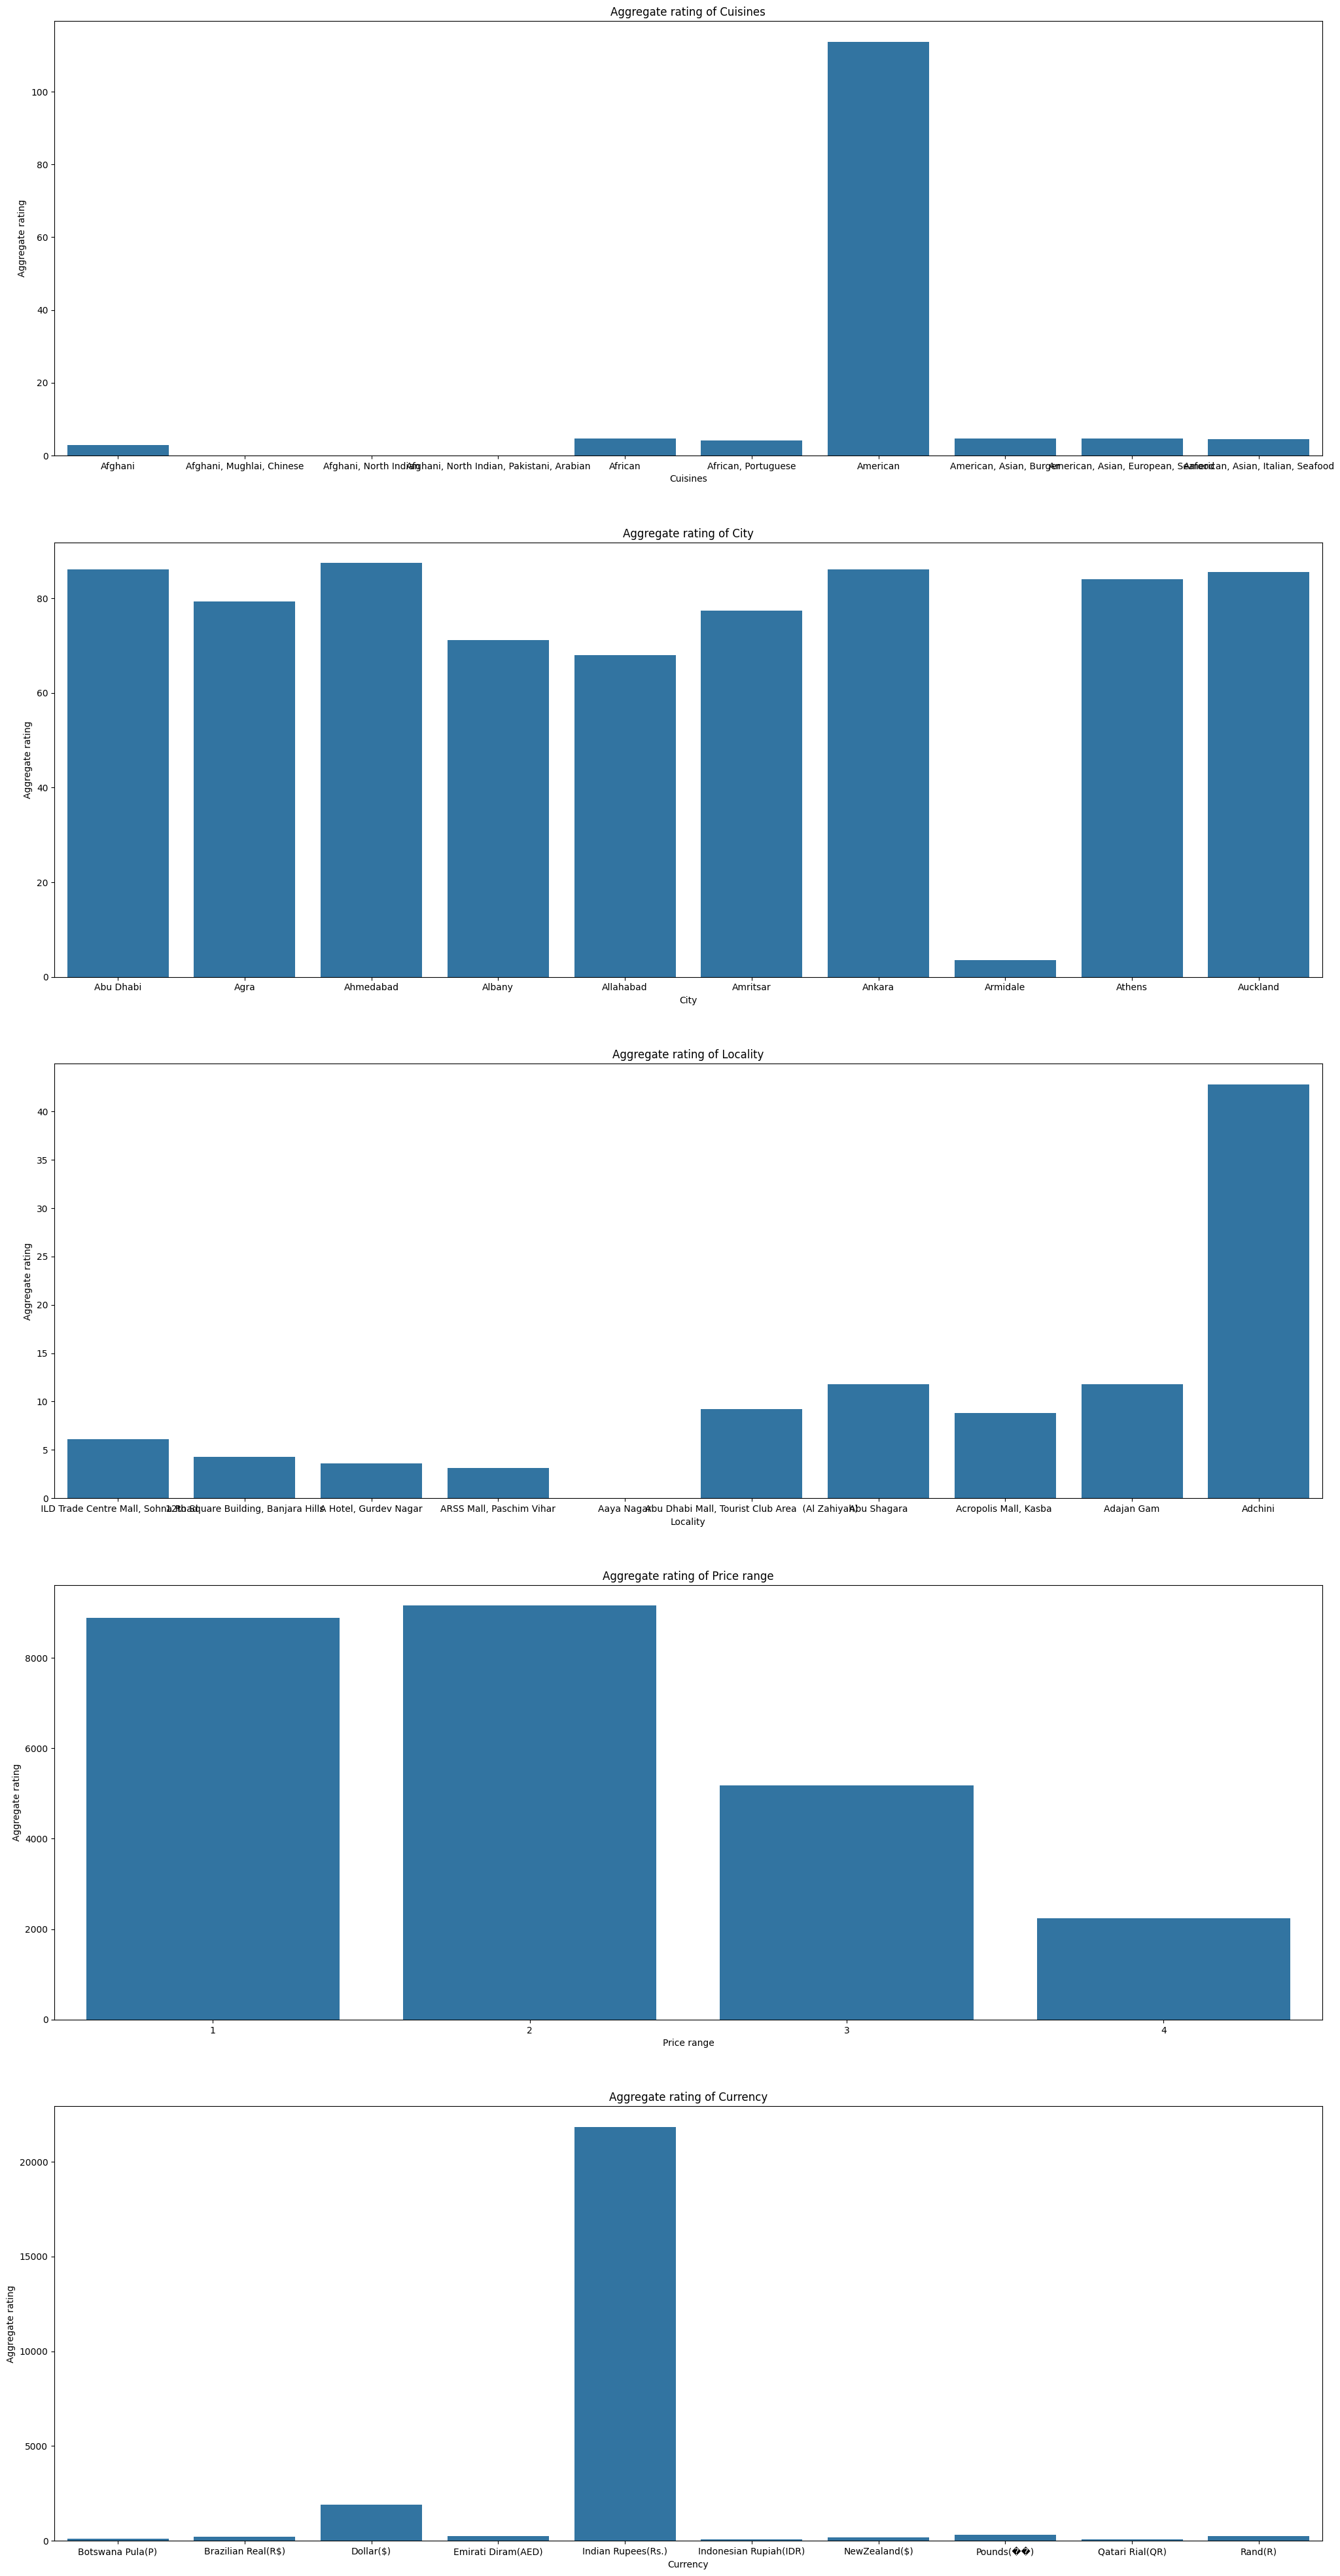

In [ ]:
# bivariet analysis of Rating with some categorical variable such as city, currency, cuisines and locality

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(25,50))

cuisines_rating = df.groupby('Cuisines')['Aggregate rating'].sum().head(10).reset_index()
sns.barplot(x='Cuisines', data=cuisines_rating, y='Aggregate rating', ax=axs[0])
axs[0].set_title('Aggregate rating of Cuisines')

cuisines_rating = df.groupby('City')['Aggregate rating'].sum().head(10).reset_index()
sns.barplot(x='City', data=cuisines_rating, y='Aggregate rating', ax=axs[1])
axs[1].set_title('Aggregate rating of City')

cuisines_rating = df.groupby('Locality')['Aggregate rating'].sum().head(10).reset_index()
sns.barplot(x='Locality', data=cuisines_rating, y='Aggregate rating', ax=axs[2])
axs[2].set_title('Aggregate rating of Locality')

cuisines_rating = df.groupby('Price range')['Aggregate rating'].sum().reset_index()
sns.barplot(x='Price range', data=cuisines_rating, y='Aggregate rating', ax=axs[3])
axs[3].set_title('Aggregate rating of Price range')

cuisines_rating = df.groupby('Currency')['Aggregate rating'].sum().head(10).reset_index()
sns.barplot(x='Currency', data=cuisines_rating, y='Aggregate rating', ax=axs[4])
axs[4].set_title('Aggregate rating of Currency')
ax.tick_params(axis='x', rotation=45)
plt.show();

In [ ]:
num_col

Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes',
       'sqrt_Aggregate rating', 'Log_Ratings'],
      dtype='object')

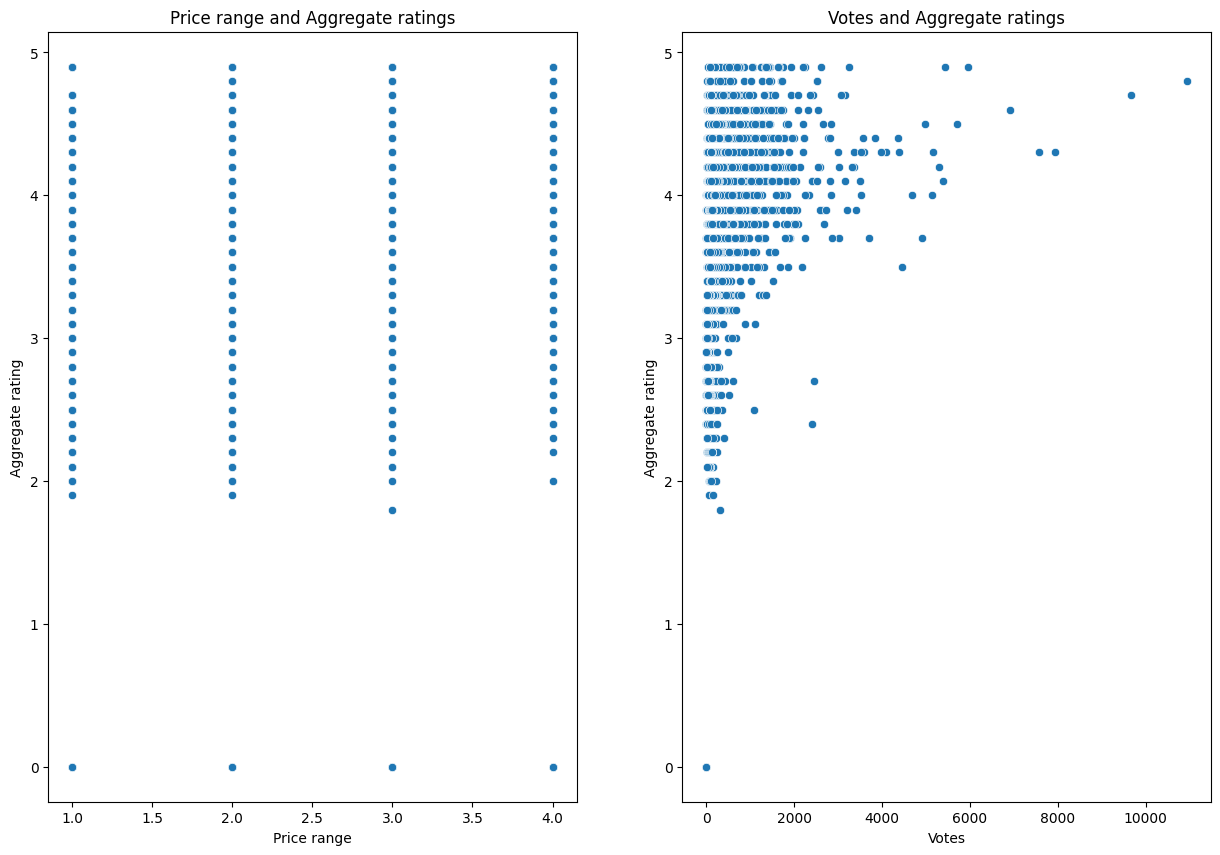

In [ ]:
# bivariet analysis of Aggregate Ratings with some of the numerical columns using scattered plots.
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

sns.scatterplot(x='Price range', y='Aggregate rating', data=df, ax=axs[0])
axs[0].set_title('Price range and Aggregate ratings')

sns.scatterplot(x='Votes', y='Aggregate rating', data=df, ax=axs[1])
axs[1].set_title('Votes and Aggregate ratings');




This shows the relationship between aggregate rating and price range and votes.

In [ ]:
# correlation matrix
corr_matrix= df[num_col].corr()

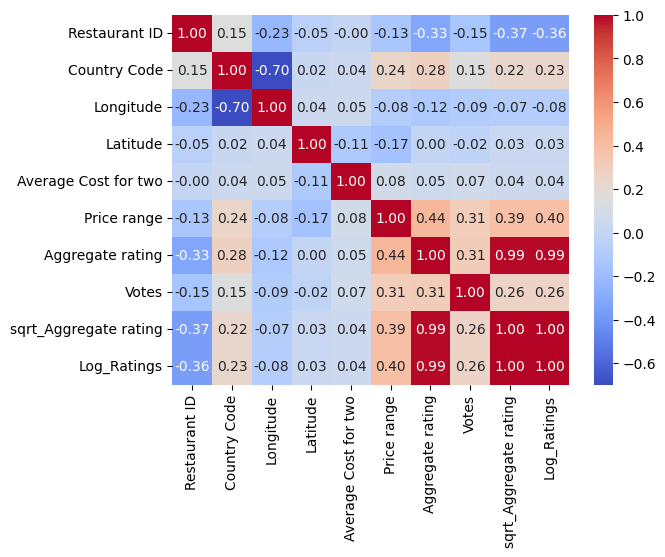

In [ ]:
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

The target variable has a very week correlation with the other variables.

In [ ]:
# Aggregating votes by city
aggregated_votes = df.groupby('City')['Votes'].agg(['mean', 'sum', 'max', 'min']).sort_values(by='sum',ascending=False).reset_index()

print(aggregated_votes)


          City         mean     sum    max  min
0    New Delhi   114.807236  628340   7931    0
1      Gurgaon   118.211091  132160   4385    0
2        Noida    68.044444   73488   2019    0
3    Bangalore  2805.750000   56115  10934  231
4      Kolkata  2229.650000   44593   7574  326
..         ...          ...     ...    ...  ...
136   Mayfield    11.000000      11     11   11
137     Miller    11.000000      11     11   11
138    Potrero     9.000000       9      9    9
139   Cochrane     6.000000       6      6    6
140    Consort     6.000000       6      6    6

[141 rows x 5 columns]


This table provides an analysis of votes cast for restaurants across different cities.


*   New Delhi has the highest total votes (628,340) but a relatively moderate average per restaurant (114.81 votes). This suggests a large number of restaurants with varying vote counts.
*   Bangalore stands out with the highest average votes per restaurant (2805.75) and a significant maximum value (10,934 votes). This indicates that Bangalore likely has fewer but more popular restaurants compared to other cities.


*   Kolkata and Gurgaon also display high average votes (2229.65 and 118.21, respectively) with notable maximum votes, this indicates some popularity among restaurants in these cities.

*   Smaller cities like Mayfield, Miller, Potrero, Cochrane, and Consort have very low totals, averaging around 6–11 votes per restaurant, likely indicating less activity or fewer restaurants.
  The high disparity between max and min in larger cities like New Delhi suggests a mix of extremely popular and less popular restaurants.Smaller cities show minimal variation, with identical values for mean, sum, max, and min, pointing to limited data or uniform engagement across restaurants.

In [ ]:
# Aggregating aggregate ratings by city
aggregated_ratings = df.groupby('City')['Aggregate rating'].agg(['mean', 'sum', 'max', 'min']).sort_values(by='mean', ascending=False).reset_index()

print(aggregated_ratings)


                 City      mean      sum  max  min
0          Inner City  4.900000      9.8  4.9  4.9
1         Quezon City  4.800000      4.8  4.8  4.8
2         Makati City  4.650000      9.3  4.8  4.5
3          Pasig City  4.633333     13.9  4.9  4.2
4    Mandaluyong City  4.625000     18.5  4.9  4.4
..                ...       ...      ...  ...  ...
136         New Delhi  2.438845  13347.8  4.9  0.0
137         Montville  2.400000      2.4  2.4  2.4
138         Mc Millan  2.400000      2.4  2.4  2.4
139             Noida  2.036204   2199.1  4.5  0.0
140         Faridabad  1.866932    468.6  4.5  0.0

[141 rows x 5 columns]


This table summarizes aggregated ratings for restaurants in various cities, with insights drawn from the mean (average rating), sum (total of all ratings), max (highest rating given), and min (lowest rating given).


*   Inner City leads with a perfect mean rating of 4.9. This indicates excellent customer satisfaction, with all ratings at the maximum possible score (4.9). Quezon City follows with a strong average of 4.8, maintaining consistent top-tier ratings. This demonstrates a balance of quality over quantity.

*   Makati City, Pasig City, and Mandaluyong City show averages above 4.6, with total ratings indicating significant customer engagement (e.g., 18.5 total ratings for Mandaluyong City).
*  New Delhi, despite having a much lower average (2.44), has a very high sum (13,347.8) because of its large restaurant dataset. However, the ratings range widely from 0.0 (no rating) to 4.9, reflecting considerable inconsistency in restaurant experiences.This may reflect higher customer engagement or more establishments. However, the lower average ratings suggest room for improvement in customer satisfaction.

*  Smaller cities like Montville, Mc Millan, Noida, and Faridabad have lower averages (1.87 to 2.40) and total ratings, likely due to limited restaurant options or lack of customer satisfaction. Notably, several cities have a min value of 0.0, likely indicating some establishments did not receive ratings. This indicates fewer restaurants and less variability in customer feedback.
  Cities with higher average ratings often have fewer restaurants but more consistent customer experiences.Larger cities (e.g., New Delhi) exhibit more variability, possibly due to a mix of highly rated and poorly rated establishments.



## **Feature Engineering/Data Pre-Processing**

In [ ]:
# filling the missing value for the variable 'Cuisine'
#df = df.fillna(value='Default Value')
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])


Earliar on in the course of exploring our data, we discovered that the variable 'Cuisines had 9 missing values and since the percentage of our missing values is less than 1% i descided to fill the missing values using mode since it is a categorical column.

In [ ]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Price range,Aggregate rating,Rating color,Rating text,Votes,sqrt_Aggregate rating,Log_Ratings,Price_Segment,Rating_Segment,Vote_Segment
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,3,4.8,Dark Green,Excellent,314,2.19089,1.757858,Mid-Range,Excellent,Moderate
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,3,4.5,Dark Green,Excellent,591,2.12132,1.704748,Mid-Range,Excellent,High


In [ ]:
# Frequency encoding for the 'City', 'Cuisines'and 'locality' columns
df['City_Frequency'] = df['City'].map(df['City'].value_counts())
df['Cuisines_Frequency'] = df['Cuisines'].map(df['Cuisines'].value_counts())
df['Locality_Frequency'] = df['Locality'].map(df['Locality'].value_counts())

I did a few feature engineering by encoding some of the categorical columns using their frequency. I did this because this columns have high cardinality which will make it possible for me to do my machine learning on the dataset. I created new columns such as City frequency, Cuisines frequency and locality frequency.

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Rating text,Votes,sqrt_Aggregate rating,Log_Ratings,Price_Segment,Rating_Segment,Vote_Segment,City_Frequency,Cuisines_Frequency,Locality_Frequency
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Excellent,314,2.190890,1.757858,Mid-Range,Excellent,Moderate,2,1,1
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Excellent,591,2.121320,1.704748,Mid-Range,Excellent,High,2,17,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Very Good,270,2.097618,1.686399,Premium,Excellent,Moderate,4,1,1
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Excellent,365,2.213594,1.774952,Premium,Excellent,Moderate,4,18,3
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Excellent,229,2.190890,1.757858,Premium,Excellent,Moderate,4,3,3


In [ ]:
# create a new data excluding the target variable and the columns that are not needed.
df1= df[['City_Frequency', 'Locality_Frequency', 'Cuisines_Frequency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Votes']]
target = df[['Log_Ratings']]


In [ ]:
df1.head()

,City_Frequency,Locality_Frequency,Cuisines_Frequency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes
0,2,1,1,Yes,No,No,No,3,314
1,2,1,17,Yes,No,No,No,3,591
2,4,1,1,Yes,No,No,No,4,270
3,4,3,18,No,No,No,No,4,365
4,4,3,3,Yes,No,No,No,4,229


In [ ]:
df1.shape

(9551, 9)

In [ ]:
target.head()

,Log_Ratings
0,1.757858
1,1.704748
2,1.686399
3,1.774952
4,1.757858


In [ ]:
target.shape

(9551, 1)

I had to drop some columns that i don't need for my machine learning and then went ahead to check my dataset info for both the target column and the other columns in other to be sure that the shapes are the same, so as to avoid errors ahead.

In [ ]:
cat_cols = df1.select_dtypes(include=['object']).columns
num_cols = df1.select_dtypes(include=np.number).columns

In [ ]:
cat_cols

Index(['Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu'],
      dtype='object')

In [ ]:
num_cols

Index(['City_Frequency', 'Locality_Frequency', 'Cuisines_Frequency',
       'Price range', 'Votes'],
      dtype='object')

## **Machine Learning**

In [ ]:
# splitting the dataset into training and testing set

X_train, X_test, y_train, y_test = train_test_split(df1, target, test_size=0.2, random_state=42)

## Encoding

In [ ]:
encoder = OneHotEncoder(drop='first')

In [ ]:
X_train.head()

,City_Frequency,Locality_Frequency,Cuisines_Frequency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes
1115,251,1,18,Yes,No,No,No,3,56
7633,5473,59,354,No,No,No,No,1,4
8267,1080,53,116,No,No,No,No,1,0
7209,5473,27,1,No,No,No,No,1,1
6242,5473,85,334,No,No,No,No,2,75


In [ ]:
y_train.head()

,Log_Ratings
1115,1.458615
7633,1.386294
8267,0.000000
7209,0.000000
6242,1.252763


In [ ]:
train_cat = encoder.fit_transform(X_train[cat_cols])
test_cat = encoder.transform(X_test[cat_cols])

In [ ]:
train_cat.toarray()

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.]])

## Scalling

In [ ]:
scaler = StandardScaler()

In [ ]:
train_num= scaler.fit_transform(X_train[num_cols])
test_num= scaler.transform(X_test[num_cols])

In [ ]:
train_num

array([[-1.29757435, -1.31505693, -0.65608801,  1.3159881 , -0.23251182],
       [ 0.85404333,  0.7218554 ,  0.53162988, -0.89298676, -0.35448121],
       [-0.95600196,  0.51114033, -0.30967029, -0.89298676, -0.36386347],
       ...,
       [ 0.85404333, -0.64779255, -0.32380979, -0.89298676, -0.36386347],
       [-1.39275315, -1.17458022, -0.71618088,  2.42047553, -0.20905617],
       [ 0.85404333,  1.00280883,  0.46093239,  0.21150067,  0.09352174]])

In [ ]:
test_num

array([[ 0.85404333,  0.61649787,  2.62074082, -0.89298676, -0.23720295],
       [-0.94034484, -1.10434186, -0.71618088,  0.21150067, -0.166836  ],
       [-0.95600196, -0.78826926,  0.46093239,  0.21150067, -0.27942313],
       ...,
       [-0.95600196, -0.7180309 , -0.30260054,  0.21150067, -0.34040782],
       [-1.39275315, -1.31505693, -0.64548338,  1.3159881 ,  0.41955529],
       [-1.39275315, -1.03410351, -0.6985065 ,  1.3159881 ,  0.64003842]])

In [ ]:
train_processed = np.hstack((train_num, train_cat.toarray()))
test_processed = np.hstack((test_num, test_cat.toarray()))

## Model Selection
For this project i will be comparing two models to see which one performs better, which are, linear regression model and random forest.

### Linear Regression Model

In [ ]:
model= LinearRegression()

In [ ]:
model.fit(train_processed, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
train_pred = model.predict(train_processed)
test_pred = model.predict(test_processed)

In [ ]:
# calculate metrics
train_mse = mean_squared_error(train_pred, y_train)
test_mse = mean_squared_error(test_pred, y_test)

train_mae = mean_absolute_error(train_pred, y_train)
test_mae = mean_absolute_error(test_pred, y_test)

train_score = r2_score(train_pred, y_train)
test_score = r2_score(test_pred, y_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# print metrics
print(f"Mean Squared Error (MSE): {train_mse, test_mse}")
print(f"Mean Absolute Error (MAE): {train_mae, test_mae}")
print(f"R-squared (R²): {train_score, test_score}")
print(f"Root Mean Squared Error (RMSE): {train_rmse, test_rmse}")

Mean Squared Error (MSE): (0.2992418388382073, 0.2949497108025053)
Mean Absolute Error (MAE): (0.44438797331104796, 0.44257233956446723)
R-squared (R²): (-2.077270413675088, -1.8616460277785034)
Root Mean Squared Error (RMSE): (np.float64(0.5470300163959994), np.float64(0.5430927276280776))


Although a lower MSE usually indicates a better model performance, the negative R² scores (-2.066 for training and -1.853 for testing) in this case indicates that the model is underperforming. This suggests the Linear Regression model isn't capturing the diversity in the data well.

## Random Forest Model

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(train_processed, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
train_pred = model.predict(train_processed)
test_pred = model.predict(test_processed)

In [ ]:
# calculate metrics
train_mse = mean_squared_error(train_pred, y_train)
test_mse = mean_squared_error(test_pred, y_test)

train_mae = mean_absolute_error(train_pred, y_train)
test_mae = mean_absolute_error(test_pred, y_test)

train_score = r2_score(train_pred, y_train)
test_score = r2_score(test_pred, y_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# print metrics
print(f"Mean Squared Error (MSE): {train_mse, test_mse}")
print(f"Mean Absolute Error (MAE): {train_mae, test_mae}")
print(f"R-squared (R²): {train_score, test_score}")
print(f"Root Mean Squared Error (RMSE): {train_rmse, test_rmse}")

Mean Squared Error (MSE): (0.0008377246992536414, 0.0056279752504958)
Mean Absolute Error (MAE): (0.018460306500088185, 0.04868728326569795)
R-squared (R²): (0.9978681323000769, 0.9853792649397407)
Root Mean Squared Error (RMSE): (np.float64(0.028943474208422897), np.float64(0.07501983238114972))


Analysis of the metrics

Mean Squared Error (MSE):

Training MSE (0.00084) and Testing MSE (0.00562) are very low, showing minimal squared differences between predicted and actual values. This highlights the model's precision.

Mean Absolute Error (MAE):

The errors in predictions are very small: Training MAE (0.01847) and Testing MAE (0.04866). This further confirms the model's accuracy.

R-squared (R²):

Training R² (0.9979) and Testing R² (0.9854) indicate that the model explains nearly all the variation in the target variable on both the training and testing datasets. These values are excellent and suggest strong predictive power.

Root Mean Squared Error (RMSE):

The RMSE values (0.0289 for training and 0.0750 for testing**) are extremely low, meaning the model's predictions closely align with the actual values.
The Random Forest model captures the relationships in the data



## **Conclusion**
The Random Forest Regressor model demonstrates a significantly improved performance compared to the Linear Regression model, indicating that the Random Forest Regressor is a better fit for my dataset.